In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
houseGrLivArea = pd.DataFrame(houseData['GrLivArea'])
houseSalePrice = pd.DataFrame(houseData['SalePrice']) 

houseGrLivArea.head()
houseSalePrice.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


Text(0.5, 3.200000000000003, 'hi')

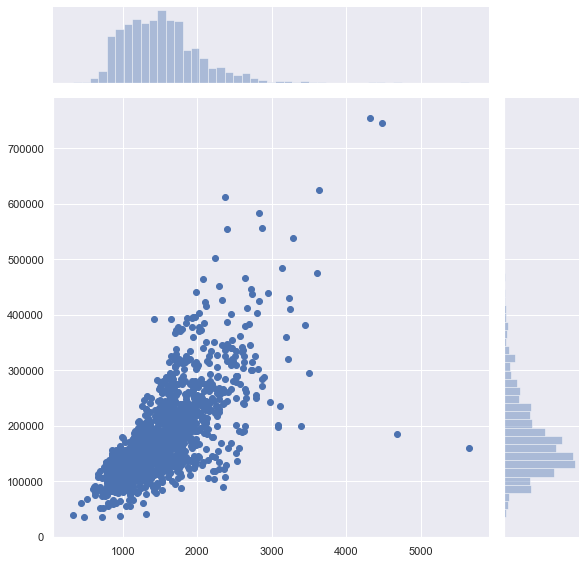

In [35]:
sb.jointplot(houseGrLivArea, houseSalePrice, height = 8)

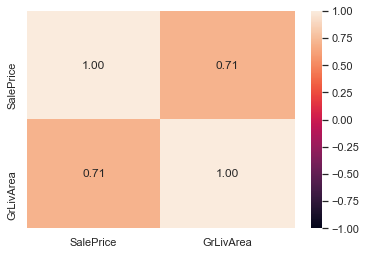

In [10]:
jointDF = pd.concat([houseSalePrice, houseGrLivArea], axis = 1)
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [16]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a Linear Regression object
linreg = LinearRegression()

In [14]:
print(len(houseGrLivArea), len(houseSalePrice))

1460 1460


In [37]:
houseGrLivArea_train, houseGrLivArea_test, houseSalePrice_train, houseSalePrice_test = train_test_split(houseGrLivArea, houseSalePrice, test_size = 360/1460)

Intercept of Regression 	: b =  [5471.65542433]
Coefficients of Regression 	: a =  [[116.68467533]]


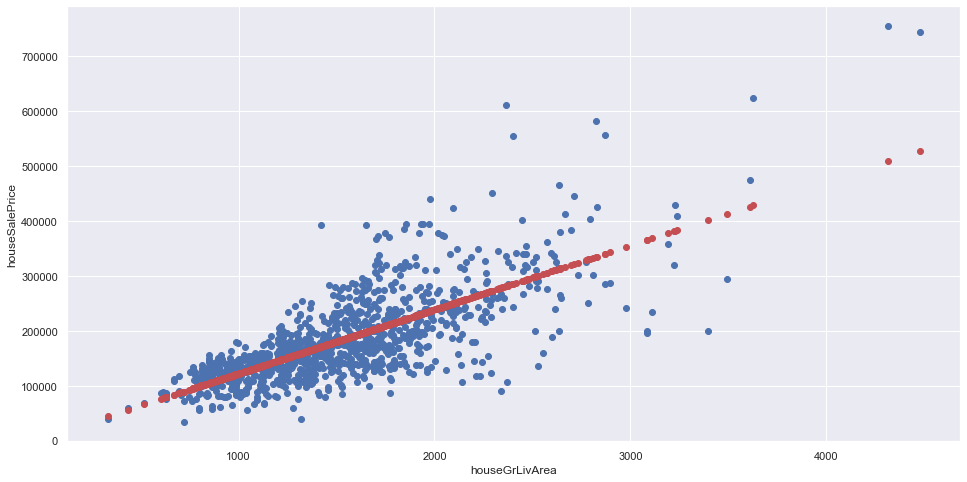

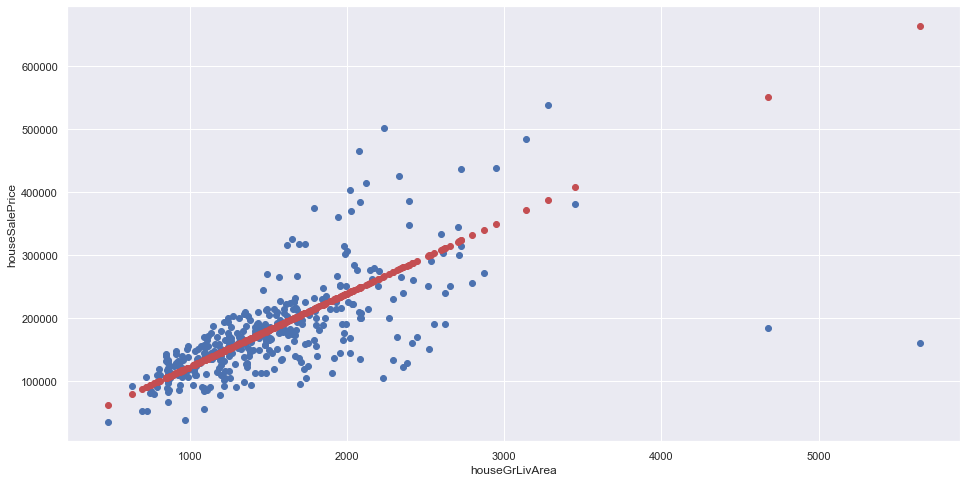

In [38]:
linreg.fit(houseGrLivArea_train, houseSalePrice_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)

# Predict Total values corresponding to houseGrLivArea
houseSalePrice_train_pred = linreg.predict(houseGrLivArea_train)
houseSalePrice_test_pred = linreg.predict(houseGrLivArea_test)

# Plot the Linear Regression line on train dataset
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseGrLivArea_train, houseSalePrice_train)
plt.scatter(houseGrLivArea_train, houseSalePrice_train_pred, color = "r")
axes.set_xlabel('houseGrLivArea')
axes.set_ylabel('houseSalePrice')
plt.show()

# Plot the Linear Regression line on test dataset
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseGrLivArea_test, houseSalePrice_test)
plt.scatter(houseGrLivArea_test, houseSalePrice_test_pred, color = "r")
axes.set_xlabel('houseGrLivArea')
axes.set_ylabel('houseSalePrice')
plt.show()

In [39]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(houseGrLivArea_train, houseSalePrice_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(houseSalePrice_train, houseSalePrice_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(houseGrLivArea_test, houseSalePrice_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(houseSalePrice_test, houseSalePrice_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5428551773014514
Mean Squared Error (MSE) 	: 2959266434.749211

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.34357040617691537
Mean Squared Error (MSE) 	: 3801505963.5254745



Intercept of Regression 	: b =  [156626.00240307]
Coefficients of Regression 	: a =  [[2.32492991]]


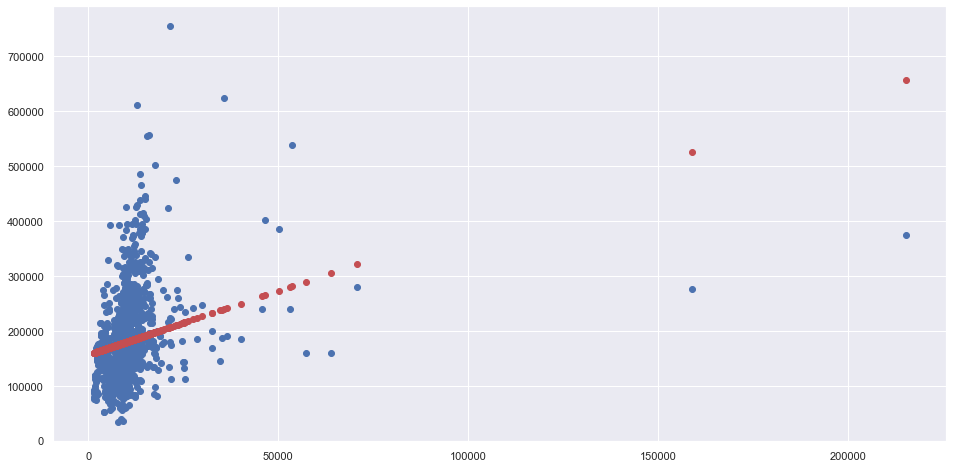

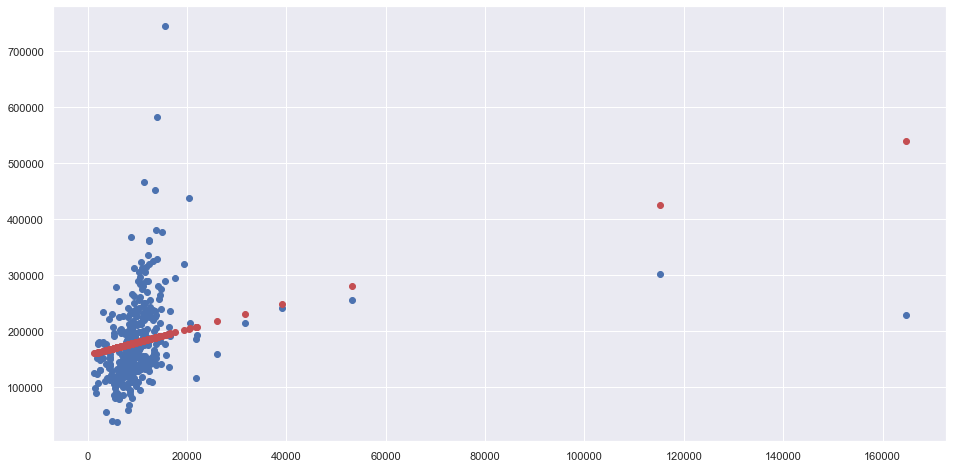

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.07764004749779951
Mean Squared Error (MSE) 	: 5988804910.57669

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.038193745869120166
Mean Squared Error (MSE) 	: 5518399656.331351



In [23]:
#LotArea vs. houseSalePrice
houseLotArea = pd.DataFrame(houseData['LotArea'])
houseLotArea_train, houseLotArea_test, houseSalePrice_train, houseSalePrice_test = train_test_split(houseLotArea, houseSalePrice, test_size = 360/1460)
linreg.fit(houseLotArea_train, houseSalePrice_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)

# Predict Total values corresponding to houseGrLivArea
houseSalePrice_train_pred = linreg.predict(houseLotArea_train)
houseSalePrice_test_pred = linreg.predict(houseLotArea_test)

# Plot the Linear Regression line on train dataset
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseLotArea_train, houseSalePrice_train)
plt.scatter(houseLotArea_train, houseSalePrice_train_pred, color = "r")
plt.show()

# Plot the Linear Regression line on test dataset
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseLotArea_test, houseSalePrice_test)
plt.scatter(houseLotArea_test, houseSalePrice_test_pred, color = "r")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(houseLotArea_train, houseSalePrice_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(houseSalePrice_train, houseSalePrice_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(houseLotArea_test, houseSalePrice_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(houseSalePrice_test, houseSalePrice_test_pred))
print()

Intercept of Regression 	: b =  [69369.73603348]
Coefficients of Regression 	: a =  [[106.72313503]]


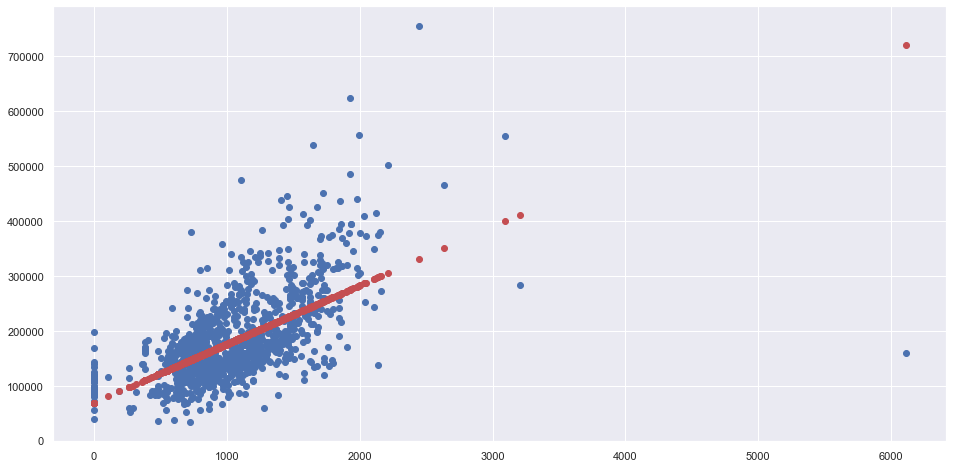

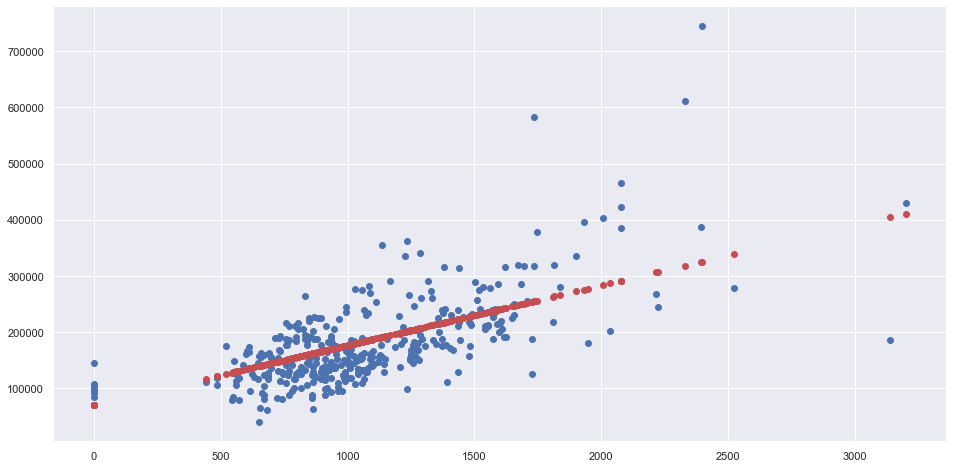

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3539286227462467
Mean Squared Error (MSE) 	: 4048755968.796803

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.44011208717833605
Mean Squared Error (MSE) 	: 3598745427.0816126



In [30]:
#TotalBsmtSF vs. houseSalePrice
houseTotalBsmtSF = pd.DataFrame(houseData['TotalBsmtSF'])
houseTotalBsmtSF_train, houseTotalBsmtSF_test, houseSalePrice_train, houseSalePrice_test = train_test_split(houseTotalBsmtSF, houseSalePrice, test_size = 360/1460)
linreg.fit(houseTotalBsmtSF_train, houseSalePrice_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)

# Predict Total values corresponding to houseGrLivArea
houseSalePrice_train_pred = linreg.predict(houseTotalBsmtSF_train)
houseSalePrice_test_pred = linreg.predict(houseTotalBsmtSF_test)

# Plot the Linear Regression line on train dataset
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseTotalBsmtSF_train, houseSalePrice_train)
plt.scatter(houseTotalBsmtSF_train, houseSalePrice_train_pred, color = "r")
plt.show()

# Plot the Linear Regression line on test dataset
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseTotalBsmtSF_test, houseSalePrice_test)
plt.scatter(houseTotalBsmtSF_test, houseSalePrice_test_pred, color = "r")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(houseTotalBsmtSF_train, houseSalePrice_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(houseSalePrice_train, houseSalePrice_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(houseTotalBsmtSF_test, houseSalePrice_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(houseSalePrice_test, houseSalePrice_test_pred))
print()

Intercept of Regression 	: b =  [69474.55476914]
Coefficients of Regression 	: a =  [[235.29375636]]


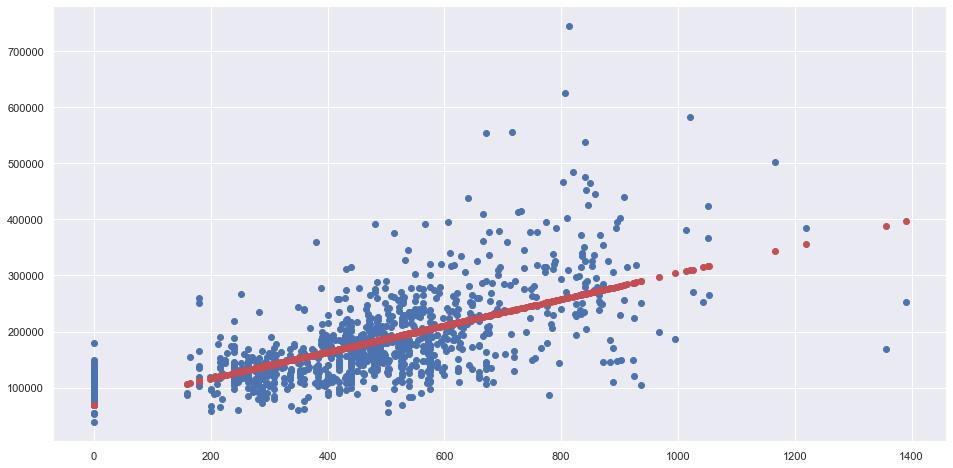

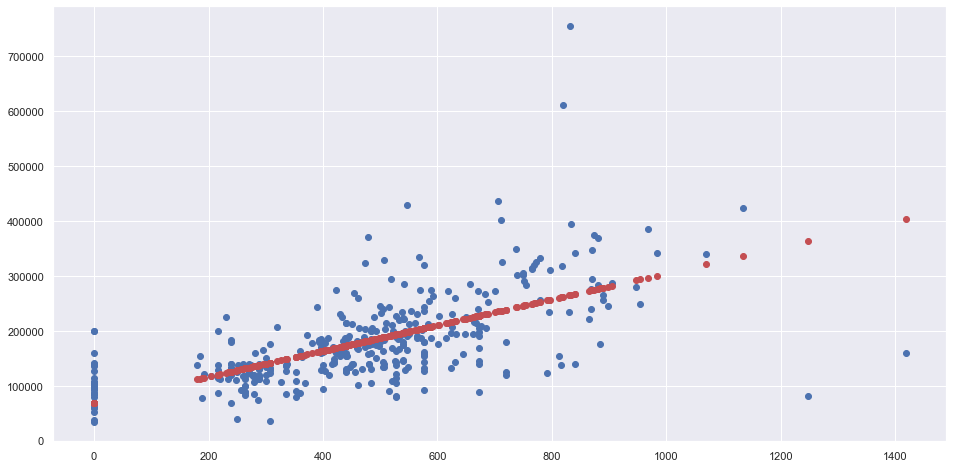

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.39233258495468026
Mean Squared Error (MSE) 	: 3737841356.4906936

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3780981410087516
Mean Squared Error (MSE) 	: 4217779379.9153833



In [34]:
#GarageArea vs. houseSalePrice
houseGarageArea = pd.DataFrame(houseData['GarageArea'])
houseGarageArea_train, houseGarageArea_test, houseSalePrice_train, houseSalePrice_test = train_test_split(houseGarageArea, houseSalePrice, test_size = 360/1460)
linreg.fit(houseGarageArea_train, houseSalePrice_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)

# Predict Total values corresponding to houseGrLivArea
houseSalePrice_train_pred = linreg.predict(houseGarageArea_train)
houseSalePrice_test_pred = linreg.predict(houseGarageArea_test)

# Plot the Linear Regression line on train dataset
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseGarageArea_train, houseSalePrice_train)
plt.scatter(houseGarageArea_train, houseSalePrice_train_pred, color = "r")
plt.show()

# Plot the Linear Regression line on test dataset
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseGarageArea_test, houseSalePrice_test)
plt.scatter(houseGarageArea_test, houseSalePrice_test_pred, color = "r")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(houseGarageArea_train, houseSalePrice_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(houseSalePrice_train, houseSalePrice_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(houseGarageArea_test, houseSalePrice_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(houseSalePrice_test, houseSalePrice_test_pred))
print()